In [2]:
from helper import plot_metrics, read_dict

env: (20x20, max_step=1000) all strategy

reward scelta best pov:
- 1 * visita cella con stima sbagliata osservata
- 8 * visita cella osservata dalla posizione migliore
- -2 se l'agente sta fermo 

reward massimizzazione IG:
- somma dell'IG di ogni cella attraversata

# Train data

In [3]:
train_data_entropy = read_dict(file_path=f"./data/entropy/train_data_entropy.json")
train_data_loss = read_dict(file_path=f"./data/loss/train_data_loss.json")
train_data_random = read_dict(file_path=f"./data/random/train_data_random.json")
train_data_ig_reward = read_dict(file_path=f"./data/ig_reward/train_data_ig_reward.json")
train_data_ig_reward_curriculum = read_dict(file_path=f"./data/ig_reward_curriculum/train_data_ig_reward_curriculum.json")

In [4]:
train_data_entropy.keys()

dict_keys(['episode_rewards', 'episode_cells_marker_pred_1', 'episode_cells_seen_pov', 'episode_steps'])

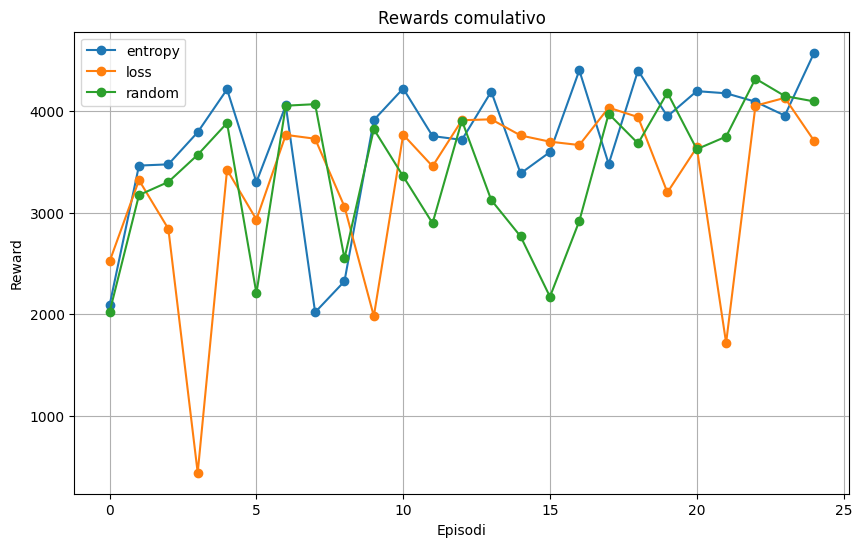

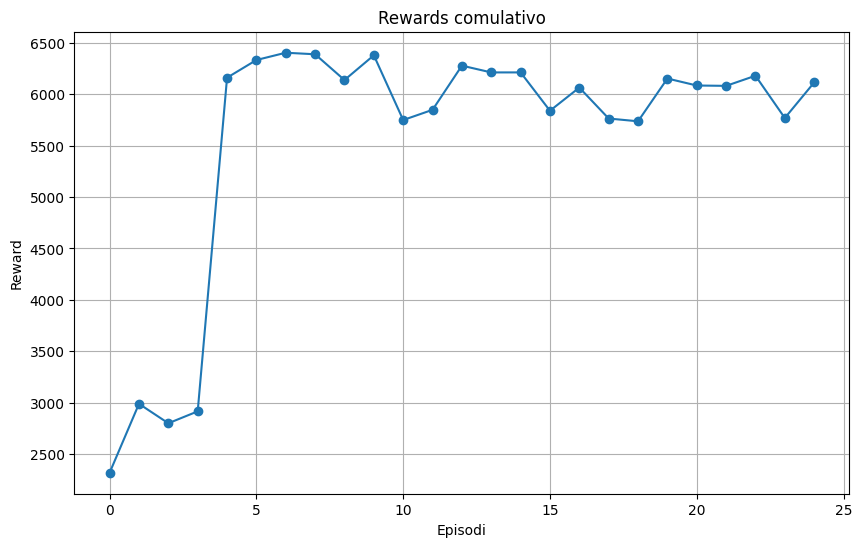

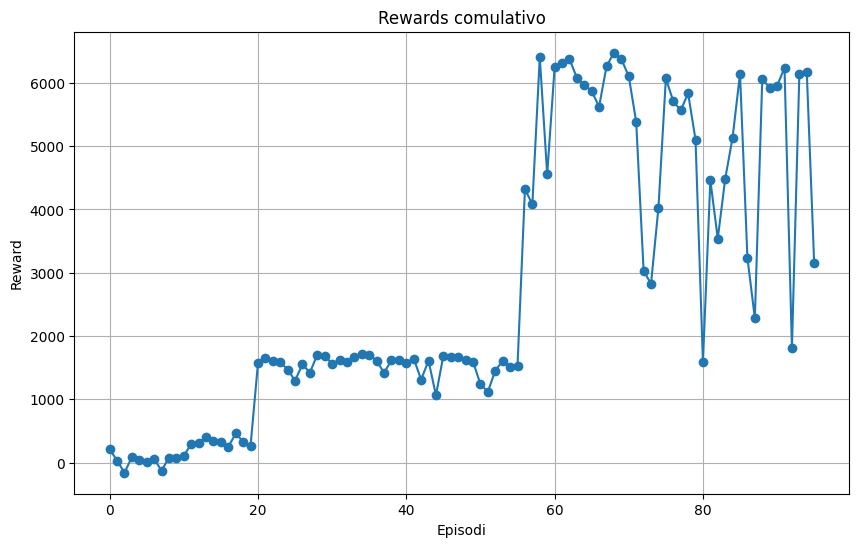

In [5]:
train_data_policy_best_pov = [train_data_entropy['episode_rewards'], train_data_loss['episode_rewards'], train_data_random['episode_rewards']]
train_data_policy_ig = [train_data_ig_reward['episode_rewards']]
train_data_policy_ig_curriculum = [train_data_ig_reward_curriculum['episode_rewards']]

plot_metrics(train_data_policy_best_pov,
             title="Rewards comulativo",
             ylabel="Reward",
             xlabel="Episodi",
             legend_labels=["entropy", "loss", "random"])

plot_metrics(train_data_policy_ig,
             title="Rewards comulativo",
             ylabel="Reward",
             xlabel="Episodi")

plot_metrics(train_data_policy_ig_curriculum,
             title="Rewards comulativo",
             ylabel="Reward",
             xlabel="Episodi")

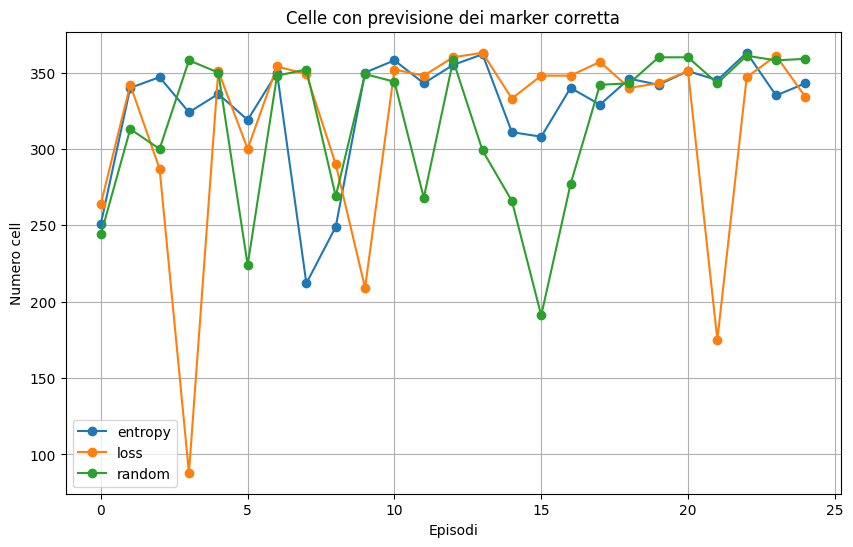

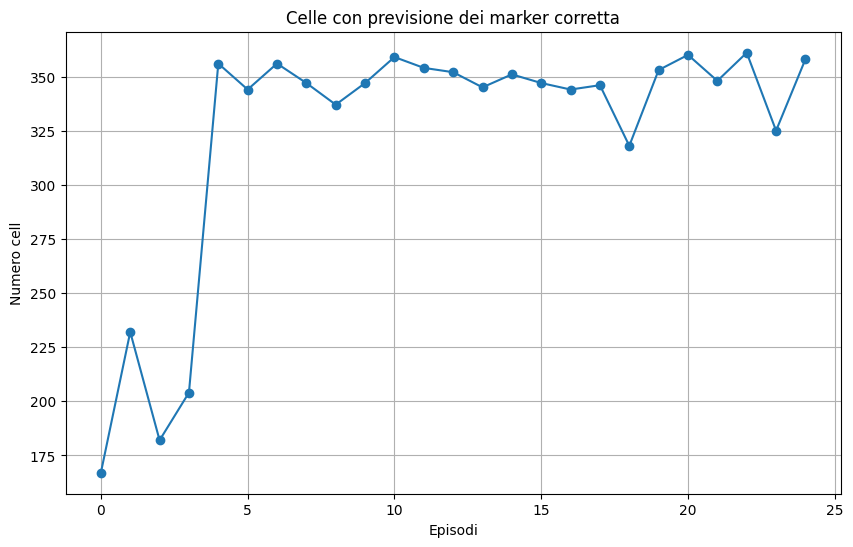

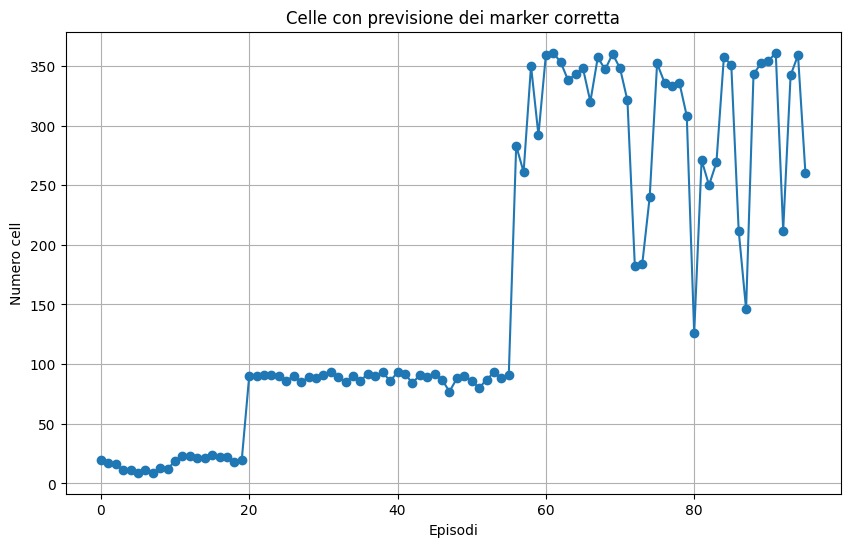

In [6]:
train_data_policy_best_pov = [train_data_entropy['episode_cells_marker_pred_1'], train_data_loss['episode_cells_marker_pred_1'], train_data_random['episode_cells_marker_pred_1']]
train_data_policy_ig = [train_data_ig_reward['episode_cells_marker_pred_1']]
train_data_policy_ig_curriculum = [train_data_ig_reward_curriculum['episode_cells_marker_pred_1']]

plot_metrics(train_data_policy_best_pov,
             title="Celle con previsione dei marker corretta",
             ylabel="Numero cell",
             xlabel="Episodi",
             legend_labels=["entropy", "loss", "random"])

plot_metrics(train_data_policy_ig,
             title="Celle con previsione dei marker corretta",
             ylabel="Numero cell",
             xlabel="Episodi")

plot_metrics(train_data_policy_ig_curriculum,
             title="Celle con previsione dei marker corretta",
             ylabel="Numero cell",
             xlabel="Episodi")

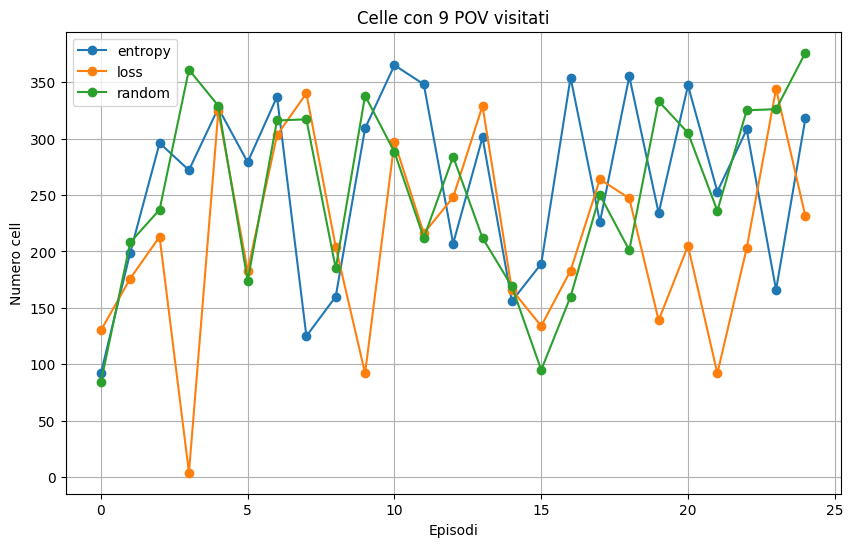

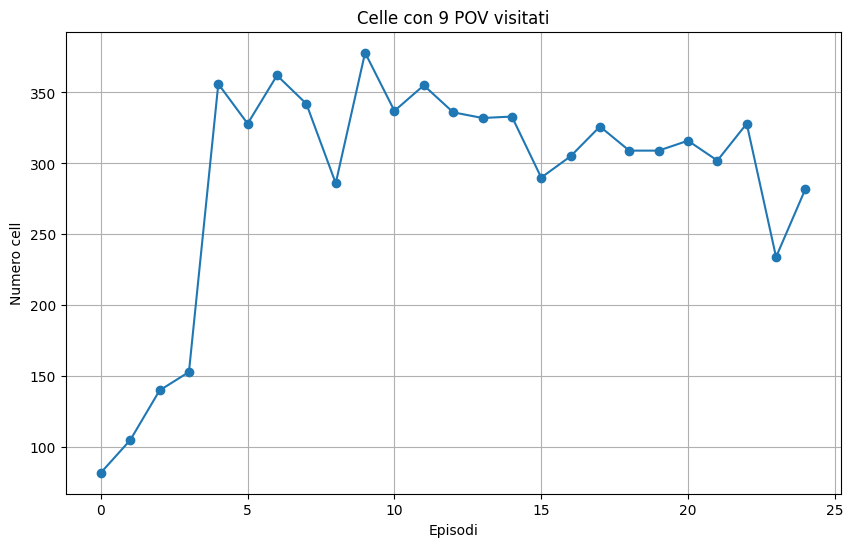

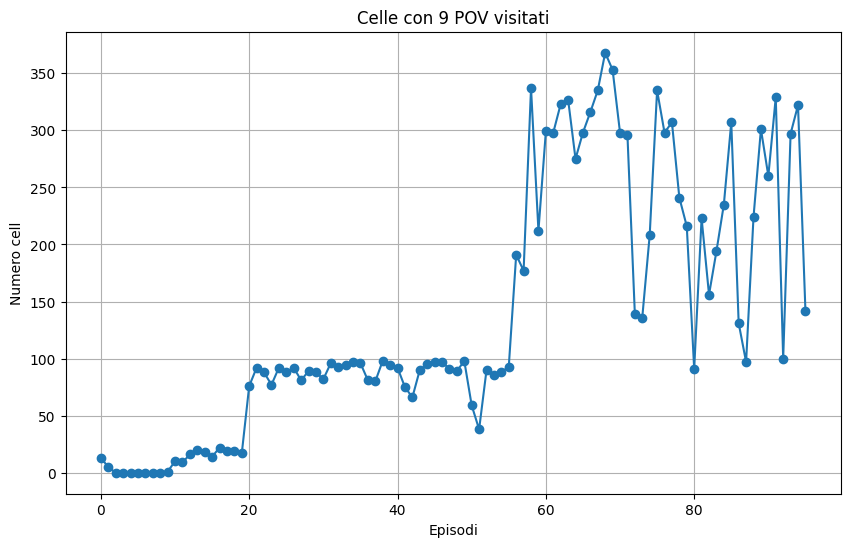

In [7]:
train_data_policy_best_pov = [train_data_entropy['episode_cells_seen_pov'], train_data_loss['episode_cells_seen_pov'], train_data_random['episode_cells_seen_pov']]
train_data_policy_ig = [train_data_ig_reward['episode_cells_seen_pov']]
train_data_policy_ig_curriculum = [train_data_ig_reward_curriculum['episode_cells_seen_pov']]

plot_metrics(train_data_policy_best_pov,
             title="Celle con 9 POV visitati",
             ylabel="Numero cell",
             xlabel="Episodi",
             legend_labels=["entropy", "loss", "random"])

plot_metrics(train_data_policy_ig,
             title="Celle con 9 POV visitati",
             ylabel="Numero cell",
             xlabel="Episodi")

plot_metrics(train_data_policy_ig_curriculum,
             title="Celle con 9 POV visitati",
             ylabel="Numero cell",
             xlabel="Episodi")

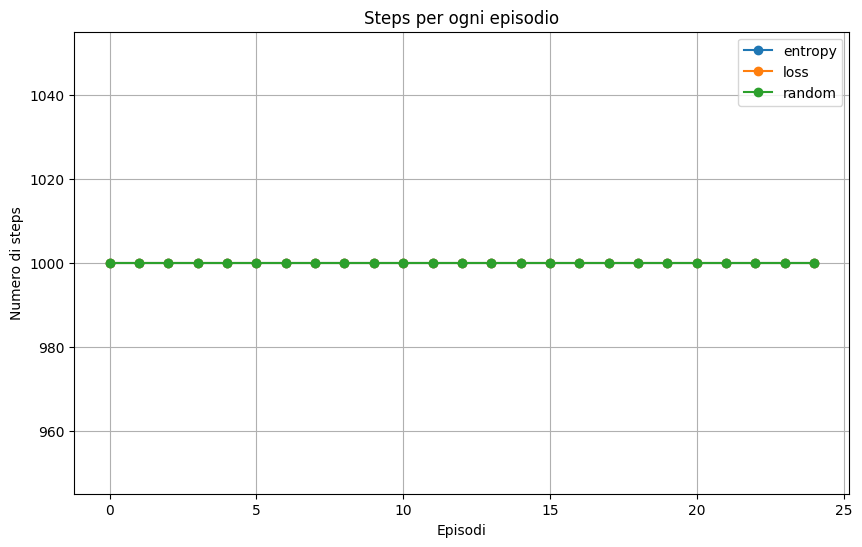

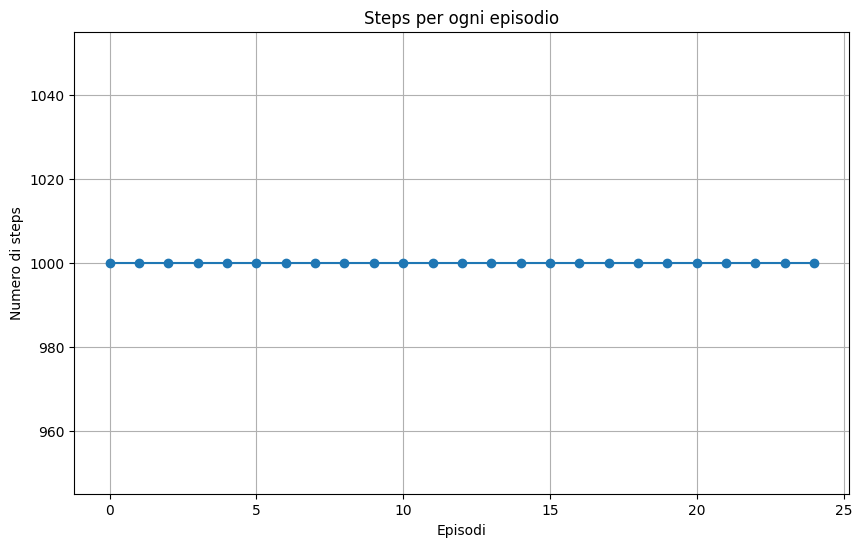

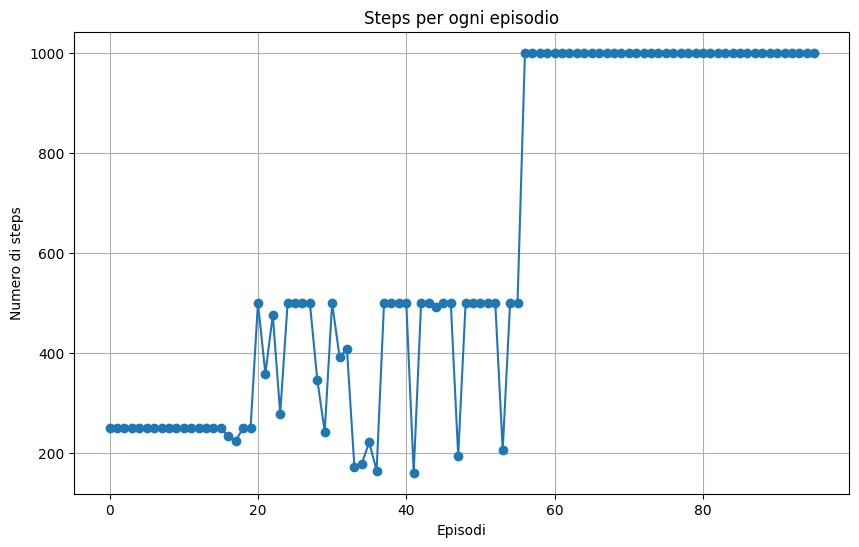

In [8]:
train_data_policy_best_pov = [train_data_entropy['episode_steps'], train_data_loss['episode_steps'], train_data_random['episode_steps']]
train_data_policy_ig = [train_data_ig_reward['episode_steps']]
train_data_policy_ig_curriculum = [train_data_ig_reward_curriculum['episode_steps']]

plot_metrics(train_data_policy_best_pov,
             title="Steps per ogni episodio",
             ylabel="Numero di steps",
             xlabel="Episodi",
             legend_labels=["entropy", "loss", "random"])

plot_metrics(train_data_policy_ig,
             title="Steps per ogni episodio",
             ylabel="Numero di steps",
             xlabel="Episodi")

plot_metrics(train_data_policy_ig_curriculum,
             title="Steps per ogni episodio",
             ylabel="Numero di steps",
             xlabel="Episodi")

# Test data

In [9]:
test_data_entropy = read_dict(file_path=f"./data/entropy/test_data_entropy.json")
test_data_loss = read_dict(file_path=f"./data/loss/test_data_loss.json")
test_data_random = read_dict(file_path=f"./data/random/test_data_random.json")
test_data_ig_reward = read_dict(file_path=f"./data/ig_reward/test_data_ig_reward.json")
test_data_ig_reward_curriculum = read_dict(file_path=f"./data/ig_reward_curriculum/test_data_ig_reward_curriculum.json")
test_data_random_agent = read_dict(file_path=f"./data/random_agent/test_data_random_agent.json")

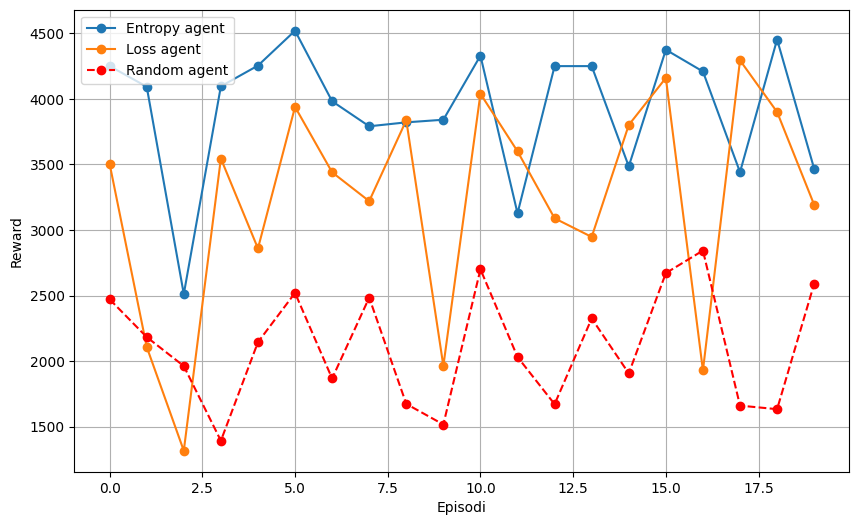

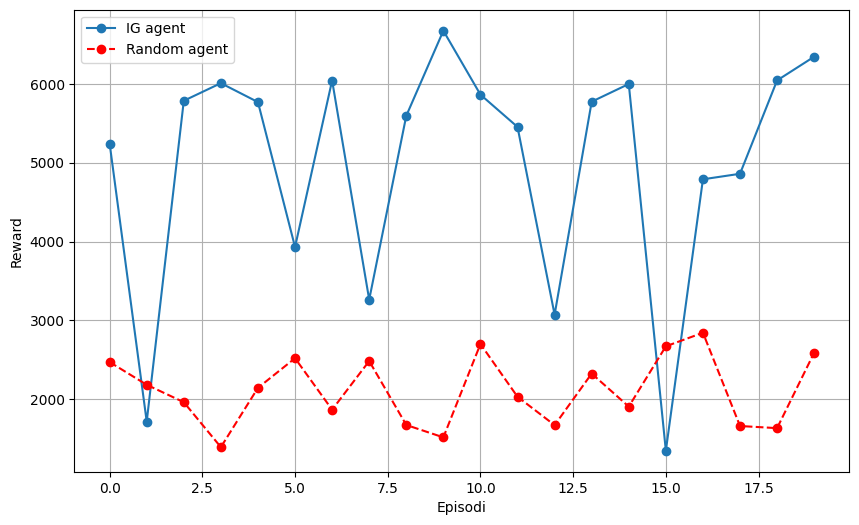

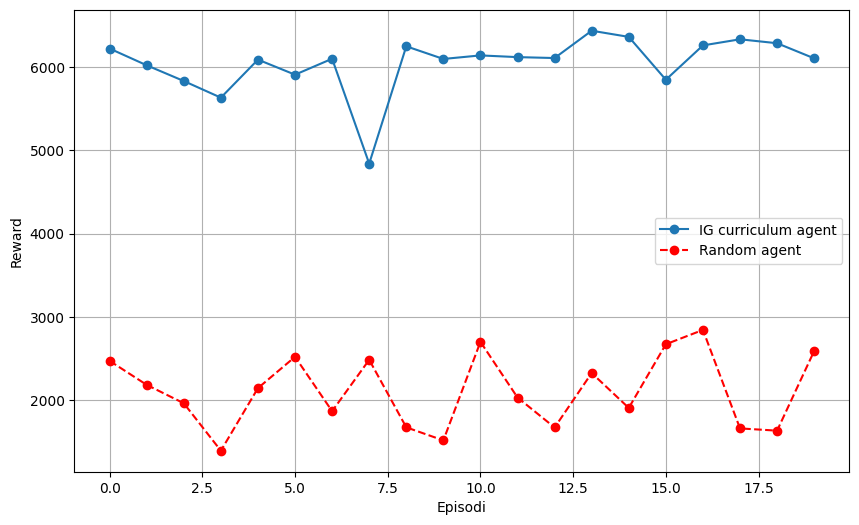

In [10]:
test_data_policy_best_pov = [test_data_entropy['cumulative_rewards_per_run'], test_data_loss['cumulative_rewards_per_run'], test_data_random_agent['cumulative_rewards_per_run']]
test_data_policy_ig = [test_data_ig_reward['cumulative_rewards_per_run'], test_data_random_agent['cumulative_rewards_per_run']]
test_data_policy_ig_curriculum = [test_data_ig_reward_curriculum['cumulative_rewards_per_run'], test_data_random_agent['cumulative_rewards_per_run']]

plot_metrics(test_data_policy_best_pov,
             #title="Cumulative Rewards",
             ylabel="Reward",
             xlabel="Episodi",
             legend_labels=["Entropy agent", "Loss agent", "Random agent"])

plot_metrics(test_data_policy_ig,
             #title="Cumulative Rewards",
             ylabel="Reward",
             xlabel="Episodi",
             legend_labels=["IG agent", "Random agent"])

plot_metrics(test_data_policy_ig_curriculum,
             #title="Cumulative Rewards",
             ylabel="Reward",
             xlabel="Episodi",
             legend_labels=["IG curriculum agent", "Random agent"])

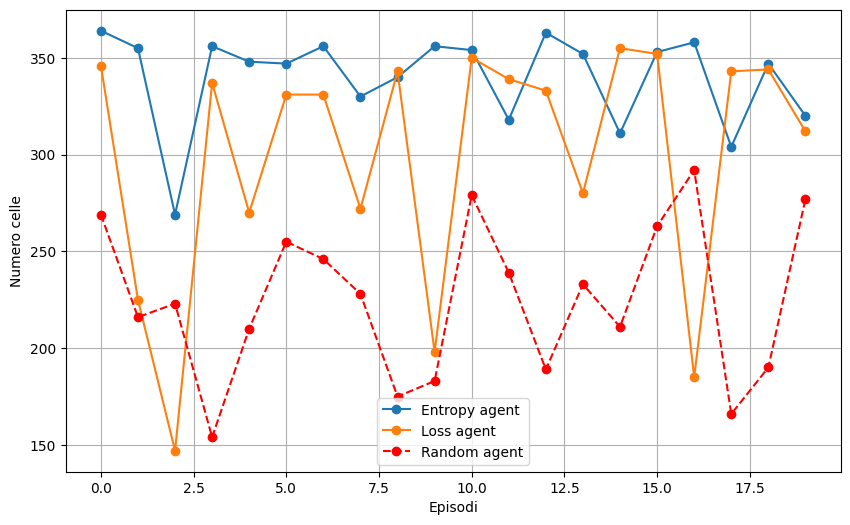

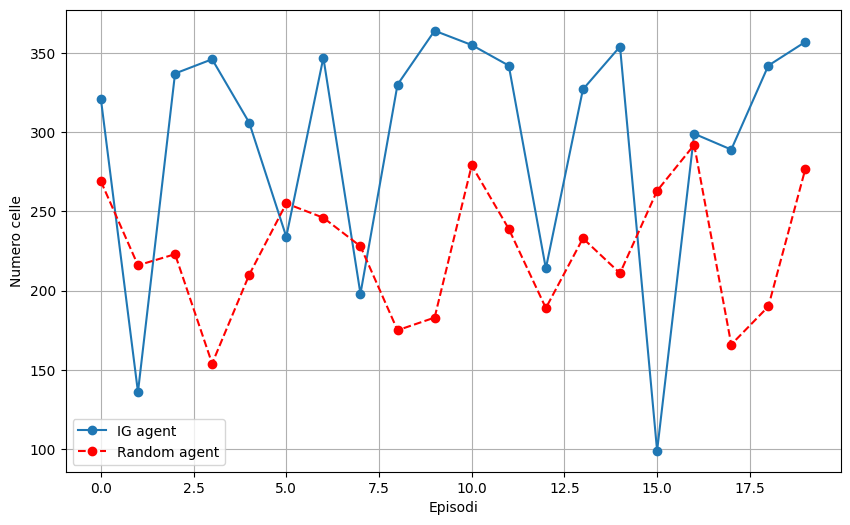

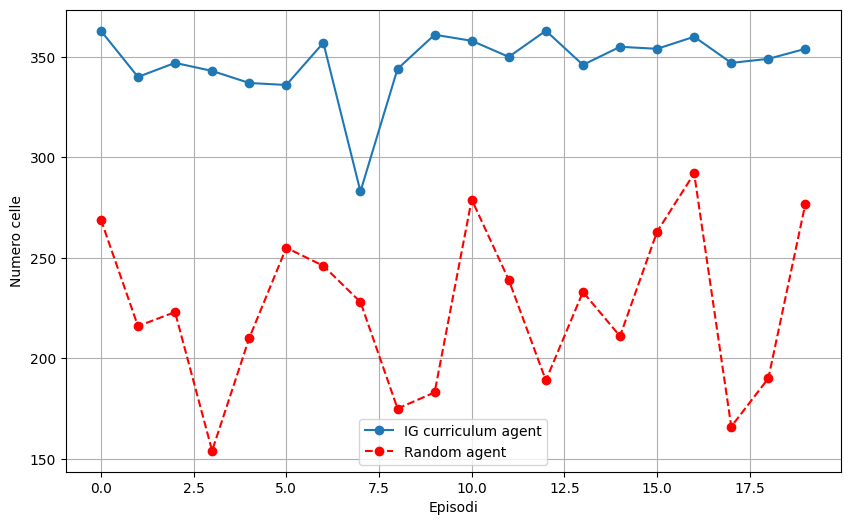

In [11]:
test_data_policy_best_pov = [test_data_entropy['cells_marker_pred_1_per_run'], test_data_loss['cells_marker_pred_1_per_run'], test_data_random_agent['cells_marker_pred_1_per_run']]
test_data_policy_ig = [test_data_ig_reward['cells_marker_pred_1_per_run'], test_data_random_agent['cells_marker_pred_1_per_run']]
test_data_policy_ig_curriculum = [test_data_ig_reward_curriculum['cells_marker_pred_1_per_run'], test_data_random_agent['cells_marker_pred_1_per_run']]

plot_metrics(test_data_policy_best_pov,
             # title="Celle con previsione dei marker corretta",
             ylabel="Numero celle",
             xlabel="Episodi",
             legend_labels=["Entropy agent", "Loss agent", "Random agent"])

plot_metrics(test_data_policy_ig,
                # title="Celle con previsione dei marker corretta",
                ylabel="Numero celle",
                xlabel="Episodi",
                legend_labels=["IG agent", "Random agent"])

plot_metrics(test_data_policy_ig_curriculum,
                # title="Celle con previsione dei marker corretta",
                ylabel="Numero celle",
                xlabel="Episodi",
                legend_labels=["IG curriculum agent", "Random agent"])

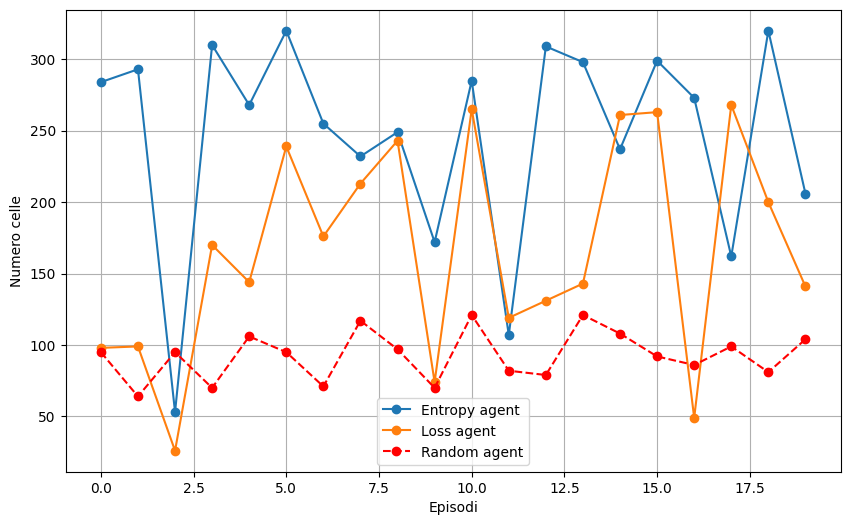

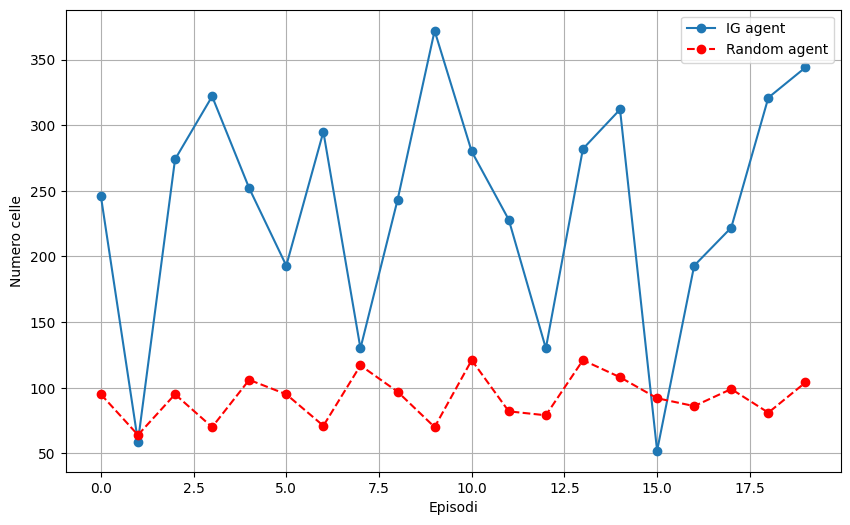

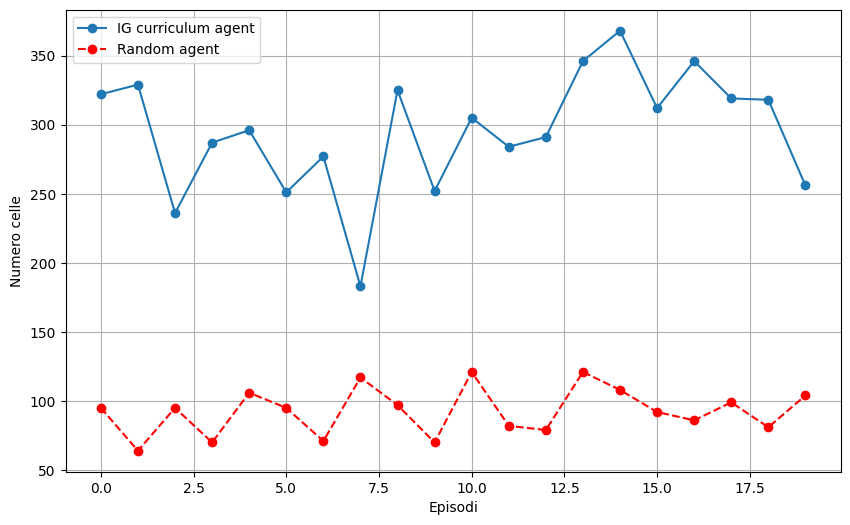

In [12]:
test_data_policy_best_pov = [test_data_entropy['cells_seen_pov_per_run'], test_data_loss['cells_seen_pov_per_run'], test_data_random_agent['cells_seen_pov_per_run']]
test_data_policy_ig = [test_data_ig_reward['cells_seen_pov_per_run'], test_data_random_agent['cells_seen_pov_per_run']]
test_data_policy_ig_curriculum = [test_data_ig_reward_curriculum['cells_seen_pov_per_run'], test_data_random_agent['cells_seen_pov_per_run']]

plot_metrics(test_data_policy_best_pov,
             # title="Celle con 9 POV visitati",
             ylabel="Numero celle",
             xlabel="Episodi",
             legend_labels=["Entropy agent", "Loss agent", "Random agent"])

plot_metrics(test_data_policy_ig,
                # title="Celle con 9 POV visitati",
                ylabel="Numero celle",
                xlabel="Episodi",
                legend_labels=["IG agent", "Random agent"])

plot_metrics(test_data_policy_ig_curriculum,
                # title="Celle con 9 POV visitati",
                ylabel="Numero celle",
                xlabel="Episodi",
                legend_labels=["IG curriculum agent", "Random agent"])

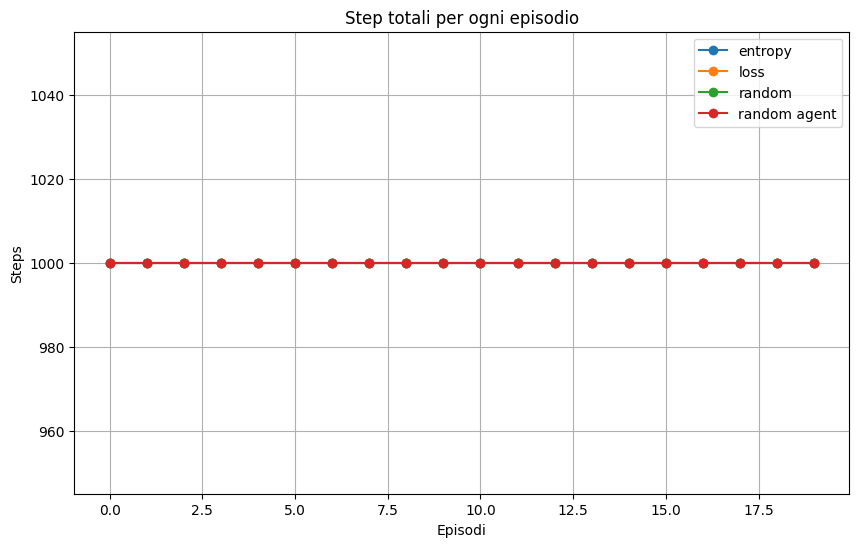

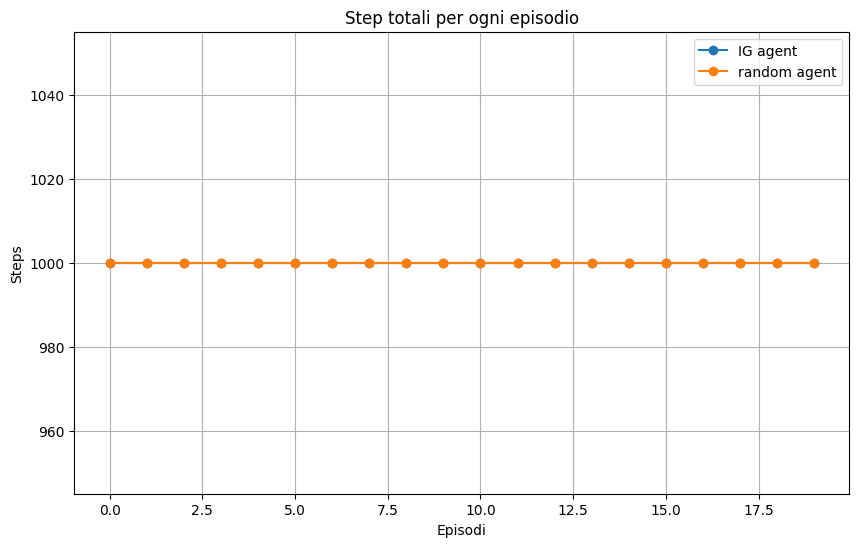

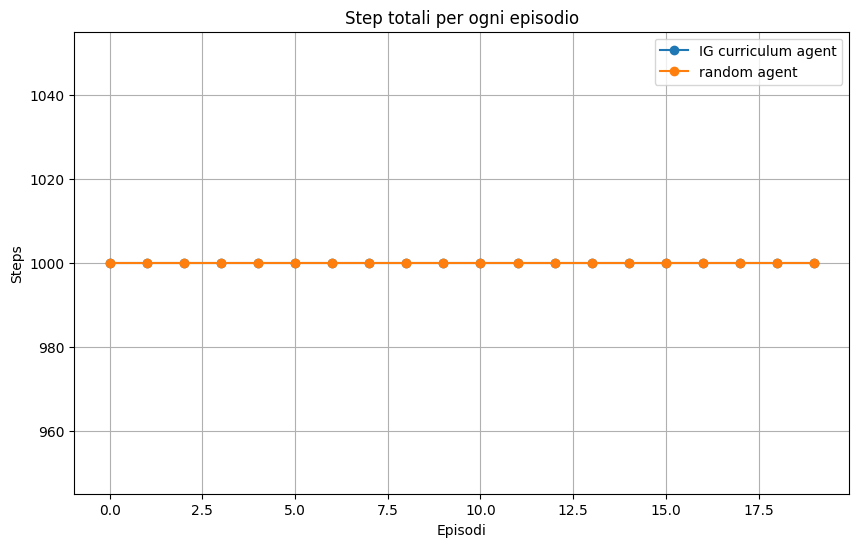

In [13]:
test_data_policy_best_pov = [test_data_entropy['total_steps_per_run'], test_data_loss['total_steps_per_run'], test_data_random['total_steps_per_run'], test_data_random_agent['total_steps_per_run']]
test_data_policy_ig = [test_data_ig_reward['total_steps_per_run'], test_data_random_agent['total_steps_per_run']]
test_data_policy_ig_curriculum = [test_data_ig_reward_curriculum['total_steps_per_run'], test_data_random_agent['total_steps_per_run']]

plot_metrics(test_data_policy_best_pov,
             title="Step totali per ogni episodio",
             ylabel="Steps",
             xlabel="Episodi",
             legend_labels=["entropy", "loss", "random", "random agent"])

plot_metrics(test_data_policy_ig,
                title="Step totali per ogni episodio",
                ylabel="Steps",
                xlabel="Episodi",
                legend_labels=["IG agent", "random agent"])

plot_metrics(test_data_policy_ig_curriculum,
                title="Step totali per ogni episodio",
                ylabel="Steps",
                xlabel="Episodi",
                legend_labels=["IG curriculum agent", "random agent"])

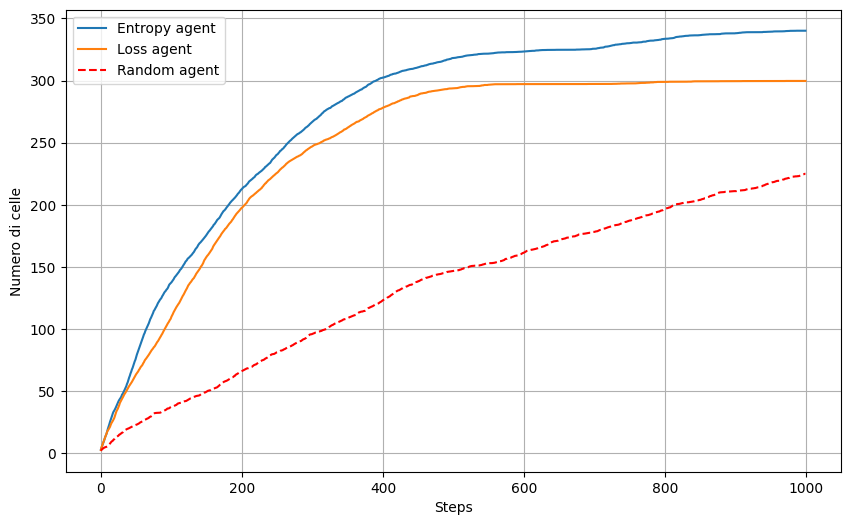

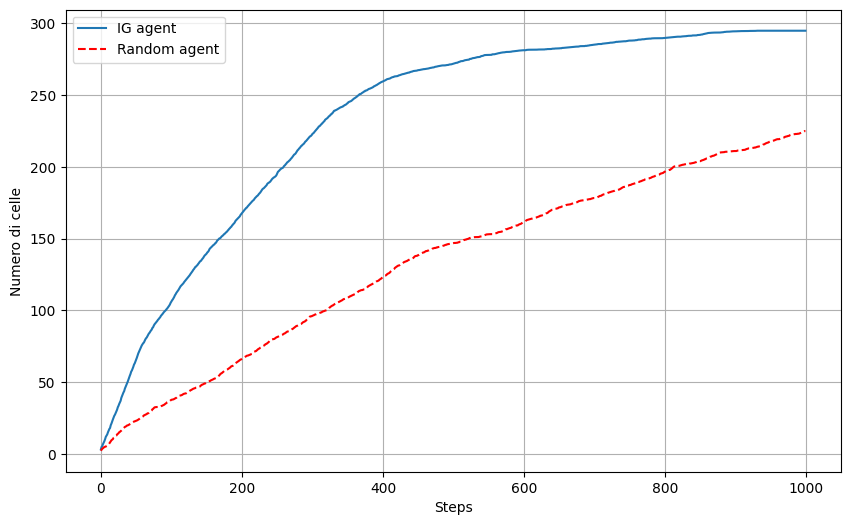

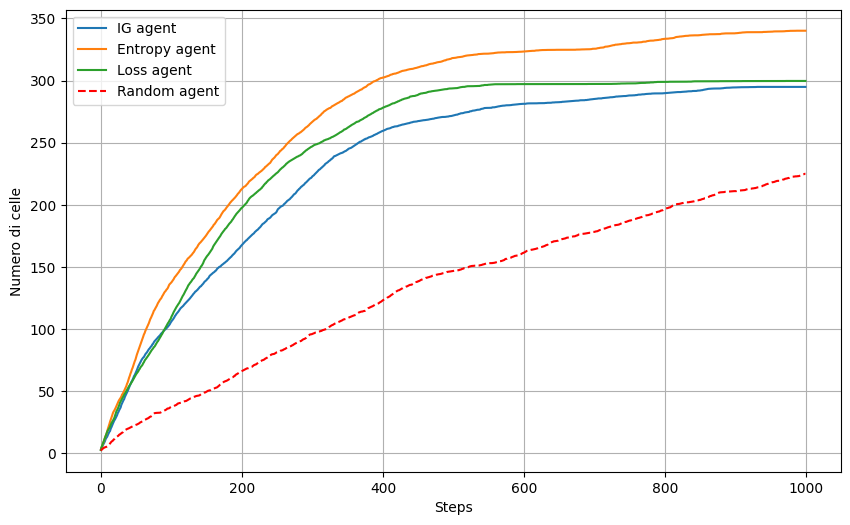

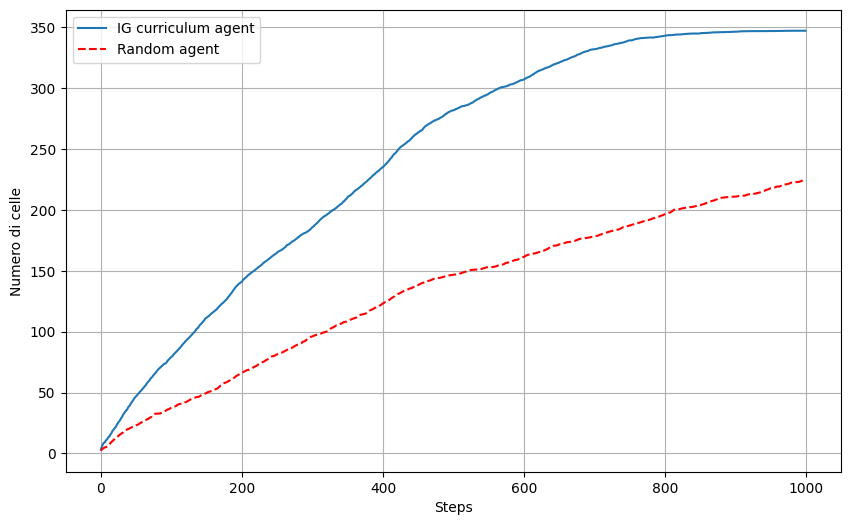

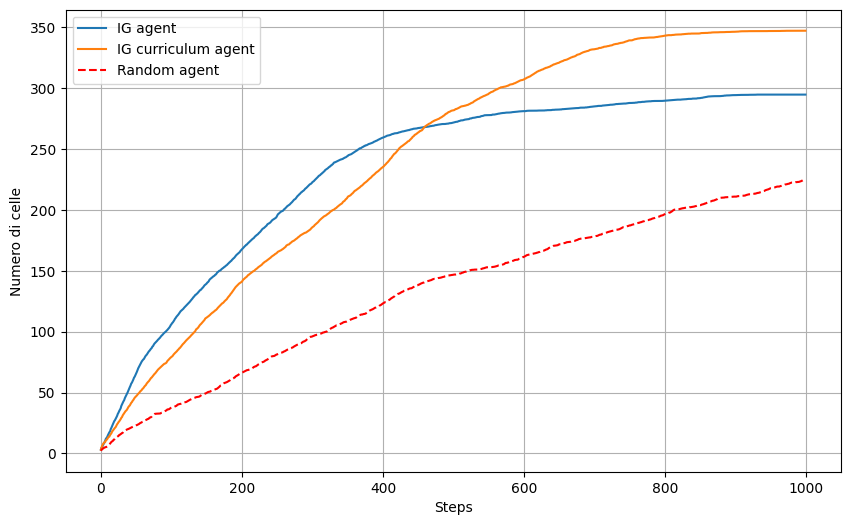

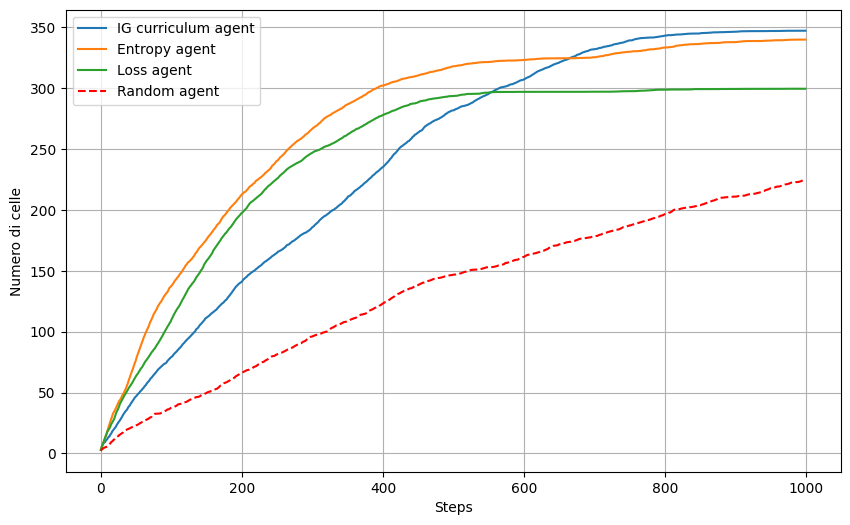

In [14]:
test_data_policy_best_pov = [test_data_entropy['cells_marker_pred_1_mean'], test_data_loss['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]
test_data_policy_ig = [test_data_ig_reward['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]
test_data_policy_ig_curriculum = [test_data_ig_reward_curriculum['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]

test_ig_vs_curriculum = [test_data_ig_reward['cells_marker_pred_1_mean'], test_data_ig_reward_curriculum['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]

test_curriculum_vs_policy_best_pov = [test_data_ig_reward_curriculum['cells_marker_pred_1_mean'], test_data_entropy['cells_marker_pred_1_mean'], test_data_loss['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]

test_policy_ig_vs_policy_best_pov = [test_data_ig_reward['cells_marker_pred_1_mean'], test_data_entropy['cells_marker_pred_1_mean'], test_data_loss['cells_marker_pred_1_mean'], test_data_random_agent['cells_marker_pred_1_mean']]

plot_metrics(test_data_policy_best_pov,
                # title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
                ylabel="Numero di celle",
                xlabel="Steps",
                legend_labels=["Entropy agent", "Loss agent", "Random agent"], 
                marker=None)

plot_metrics(test_data_policy_ig,
                # title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
                ylabel="Numero di celle",
                xlabel="Steps",
                legend_labels=["IG agent", "Random agent"], 
                marker=None)

plot_metrics(test_policy_ig_vs_policy_best_pov,
                # title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
                ylabel="Numero di celle",
                xlabel="Steps",
                legend_labels=["IG agent", "Entropy agent", "Loss agent", "Random agent"], 
                marker=None)

plot_metrics(test_data_policy_ig_curriculum,
                # title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
                ylabel="Numero di celle",
                xlabel="Steps",
                legend_labels=["IG curriculum agent", "Random agent"], 
                marker=None)

plot_metrics(test_ig_vs_curriculum,
                # title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
                ylabel="Numero di celle",
                xlabel="Steps",
                legend_labels=["IG agent", "IG curriculum agent", "Random agent"],
                marker=None)

plot_metrics(test_curriculum_vs_policy_best_pov,
                # title="Celle con previsione dei marker corretta ad ogni step (media su 20 run)",
                ylabel="Numero di celle",
                xlabel="Steps",
                legend_labels=["IG curriculum agent", "Entropy agent", "Loss agent", "Random agent"],
                marker=None)